<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 3

### Regression and Classification with the Ames Housing Data

---

You have just joined a new "full stack" real estate company in Ames, Iowa. The strategy of the firm is two-fold:
- Own the entire process from the purchase of the land all the way to sale of the house, and anything in between.
- Use statistical analysis to optimize investment and maximize return.

The company is still small, and though investment is substantial the short-term goals of the company are more oriented towards purchasing existing houses and flipping them as opposed to constructing entirely new houses. That being said, the company has access to a large construction workforce operating at rock-bottom prices.

This project uses the [Ames housing data recently made available on kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
pd.set_option('display.max_rows',2000) # to display more rows in output
pd.set_option('display.max_columns',2000) # to display more columns in output

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Estimating the value of homes from fixed characteristics.

---

Your superiors have outlined this year's strategy for the company:
1. Develop an algorithm to reliably estimate the value of residential houses based on *fixed* characteristics.
2. Identify characteristics of houses that the company can cost-effectively change/renovate with their construction team.
3. Evaluate the mean dollar value of different renovations.

Then we can use that to buy houses that are likely to sell for more than the cost of the purchase plus renovations.

Your first job is to tackle #1. You have a dataset of housing sale data with a huge amount of features identifying different aspects of the house. The full description of the data features can be found in a separate file:

    housing.csv
    data_description.txt
    
You need to build a reliable estimator for the price of the house given characteristics of the house that cannot be renovated. Some examples include:
- The neighborhood
- Square feet
- Bedrooms, bathrooms
- Basement and garage space

and many more. 

Some examples of things that **ARE renovate-able:**
- Roof and exterior features
- "Quality" metrics, such as kitchen quality
- "Condition" metrics, such as condition of garage
- Heating and electrical components

and generally anything you deem can be modified without having to undergo major construction on the house.

---

**Your goals:**
1. Perform any cleaning, feature engineering, and EDA you deem necessary.
- Be sure to remove any houses that are not residential from the dataset.
- Identify **fixed** features that can predict price.
- Train a model on pre-2010 data and evaluate its performance on the 2010 houses.
- Characterize your model. How well does it perform? What are the best estimates of price?

> **Note:** The EDA and feature engineering component to this project is not trivial! Be sure to always think critically and creatively. Justify your actions! Use the data description file!

In [3]:
# Load the data
house = pd.read_csv('./housing.csv') 

In [4]:
house.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


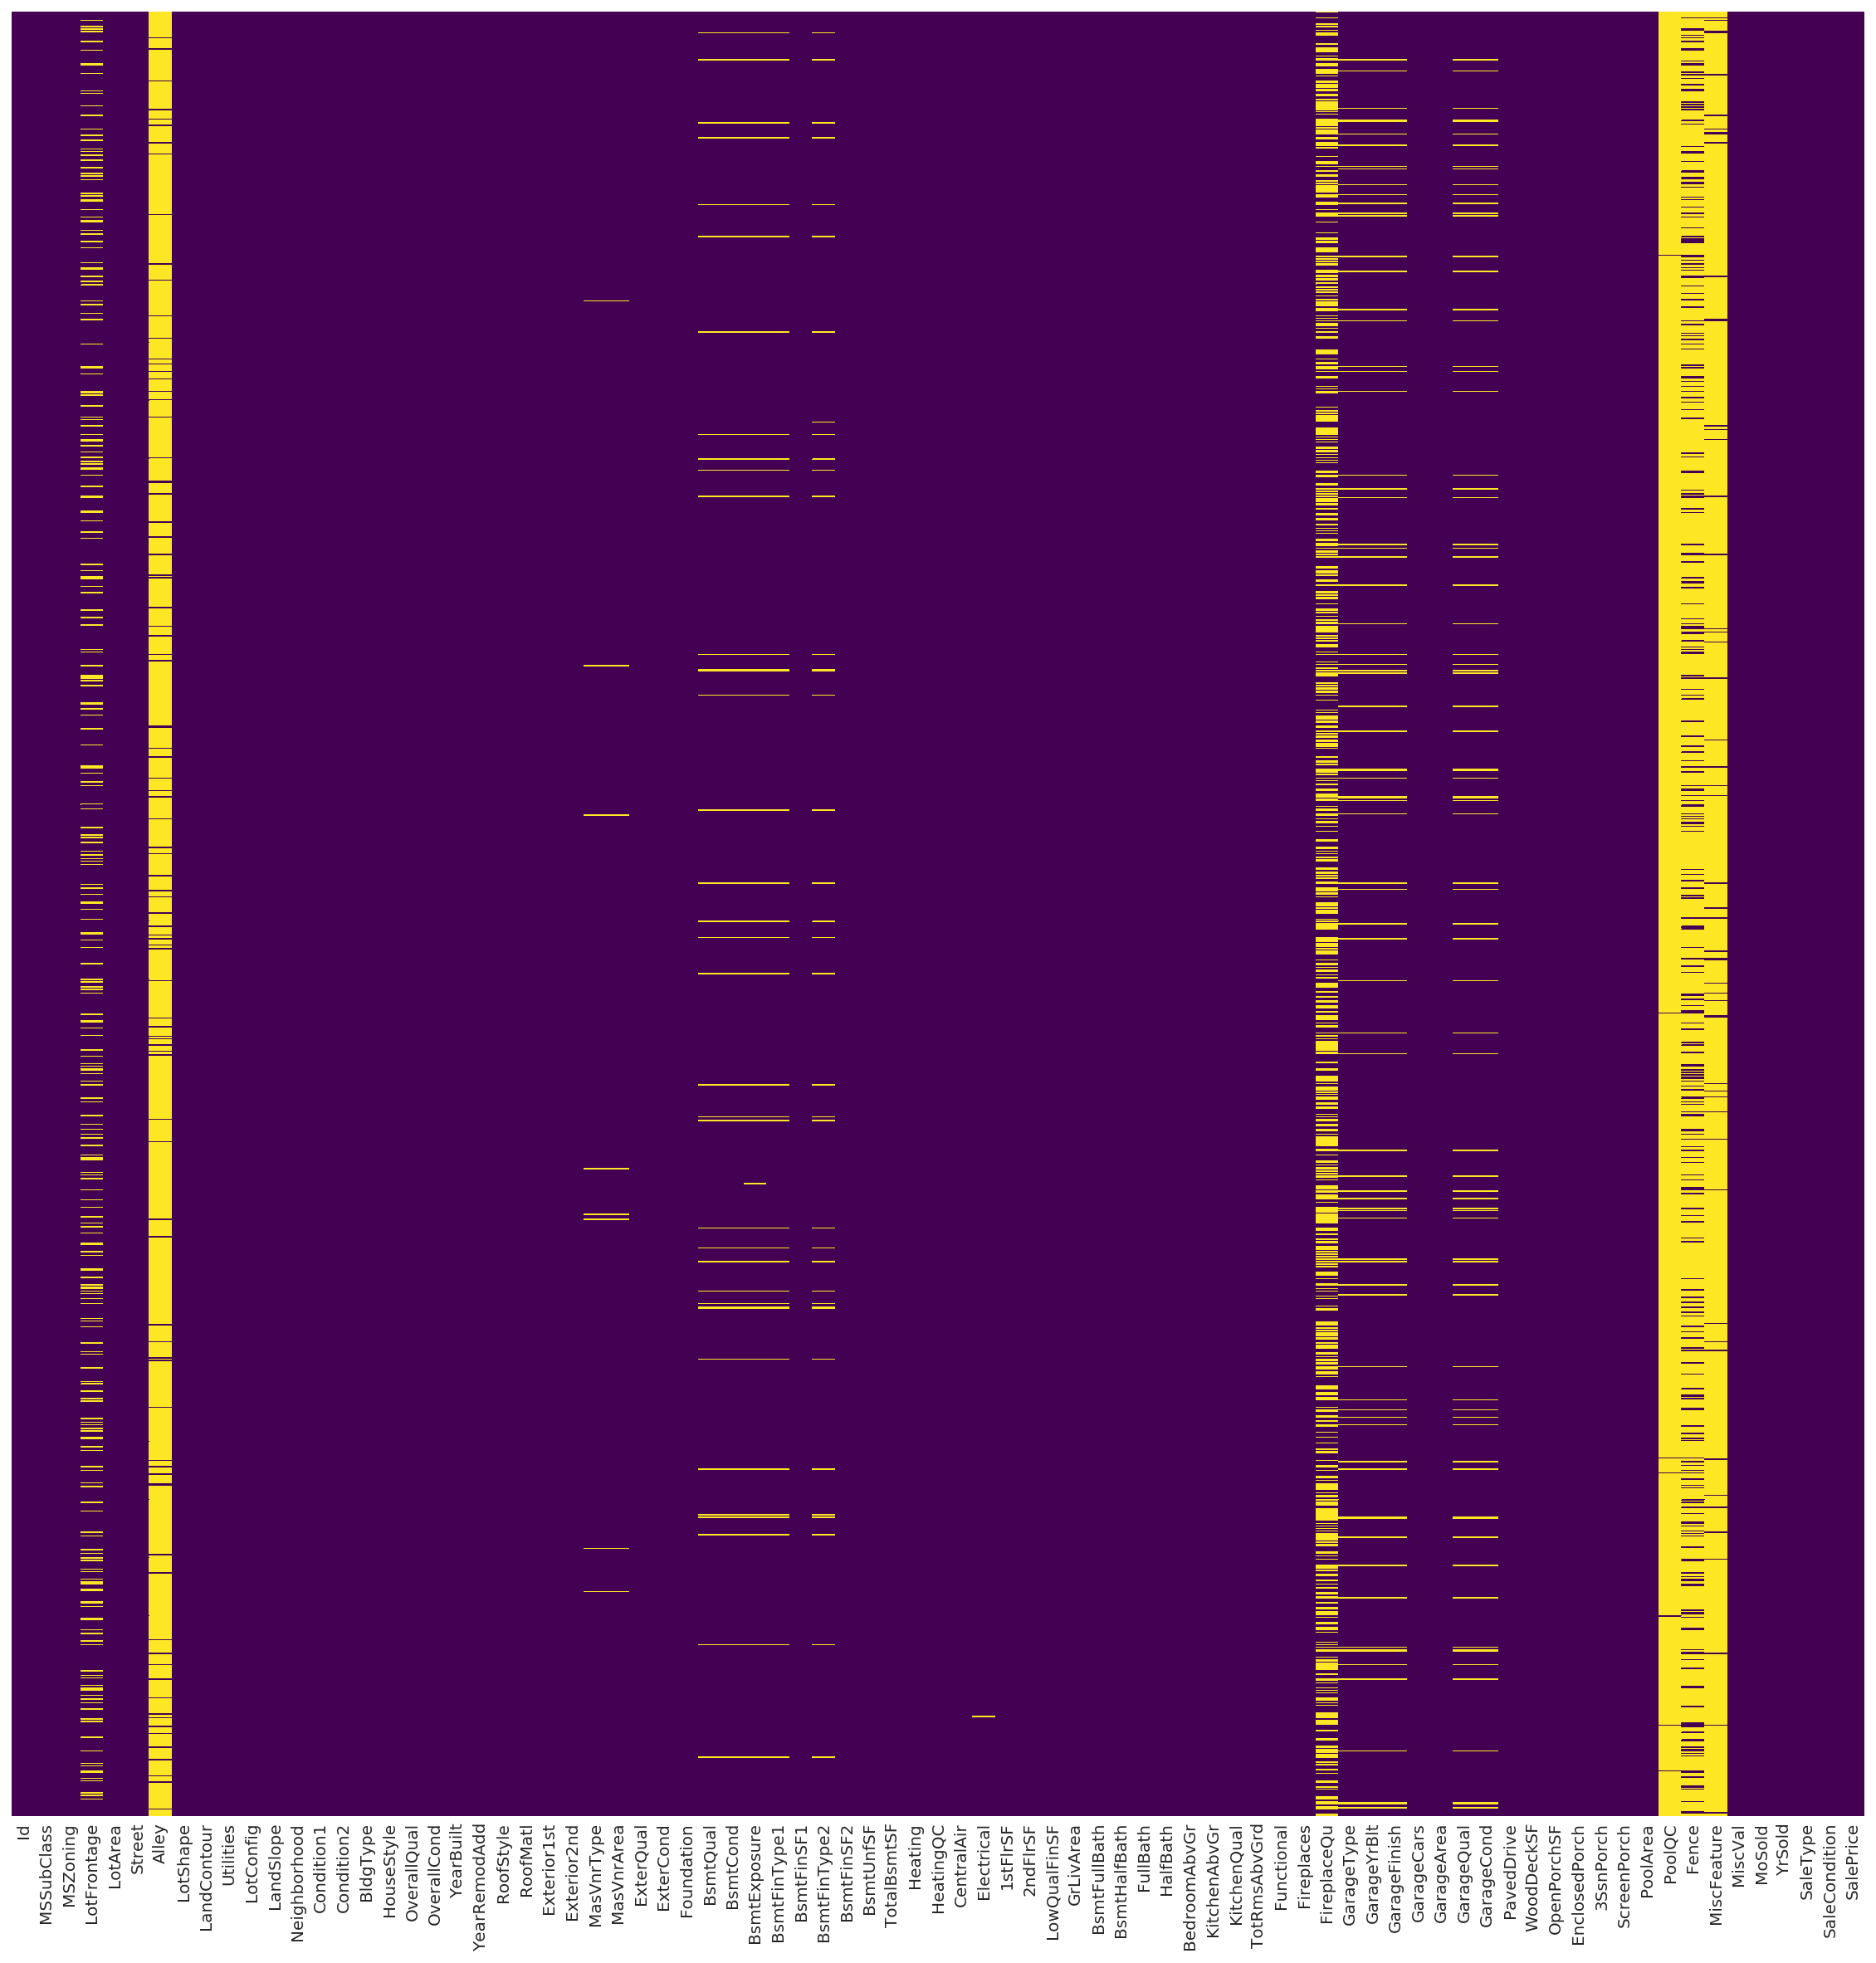

In [7]:
plt.figure(figsize=(20,20))
sns.heatmap(house.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [8]:
for columns in house.columns:
    print(columns,house[columns].unique())

Id [   1    2    3 ... 1458 1459 1460]
MSSubClass [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
MSZoning ['RL' 'RM' 'C (all)' 'FV' 'RH']
LotFrontage [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
LotArea [ 8450  9600 11250 ... 17217 13175  9717]
Street ['Pave' 'Grvl']
Alley [nan 'Grvl' 'Pave']
LotShape ['Reg' 'IR1' 'IR2' 'IR3']
LandContour ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities ['AllPub' 'NoSeWa']
LotConfig ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope ['Gtl' 

In [9]:

# Create a new dataframe of sum of isnull values in column name
# of original dataset

a = house.isnull().sum()
b = pd.DataFrame(a,columns=['sum_isnull'])

In [10]:
c = b[b.sum_isnull !=0]

#dropping all the non 0 to determine which columns have null values

c

,sum_isnull
LotFrontage,259
Alley,1369
MasVnrType,8
MasVnrArea,8
BsmtQual,37
BsmtCond,37
BsmtExposure,38
BsmtFinType1,37
BsmtFinType2,38
Electrical,1


In [11]:
row_name = c.index.values

row_name
#to get row names (column names of original data with null values)

array(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'], dtype=object)

In [12]:
data_type = house[row_name].dtypes
# to return datatype of column name with null values in original data

In [13]:
e = pd.concat([c,data_type],axis=1)

e = e.rename(index=str,columns={'sum_isnull':'sum_isnull',0:'data_type'})

e
# concat data_type to sum_isnull so it is easier to reference

,sum_isnull,data_type
LotFrontage,259,float64
Alley,1369,object
MasVnrType,8,object
MasVnrArea,8,float64
BsmtQual,37,object
BsmtCond,37,object
BsmtExposure,38,object
BsmtFinType1,37,object
BsmtFinType2,38,object
Electrical,1,object


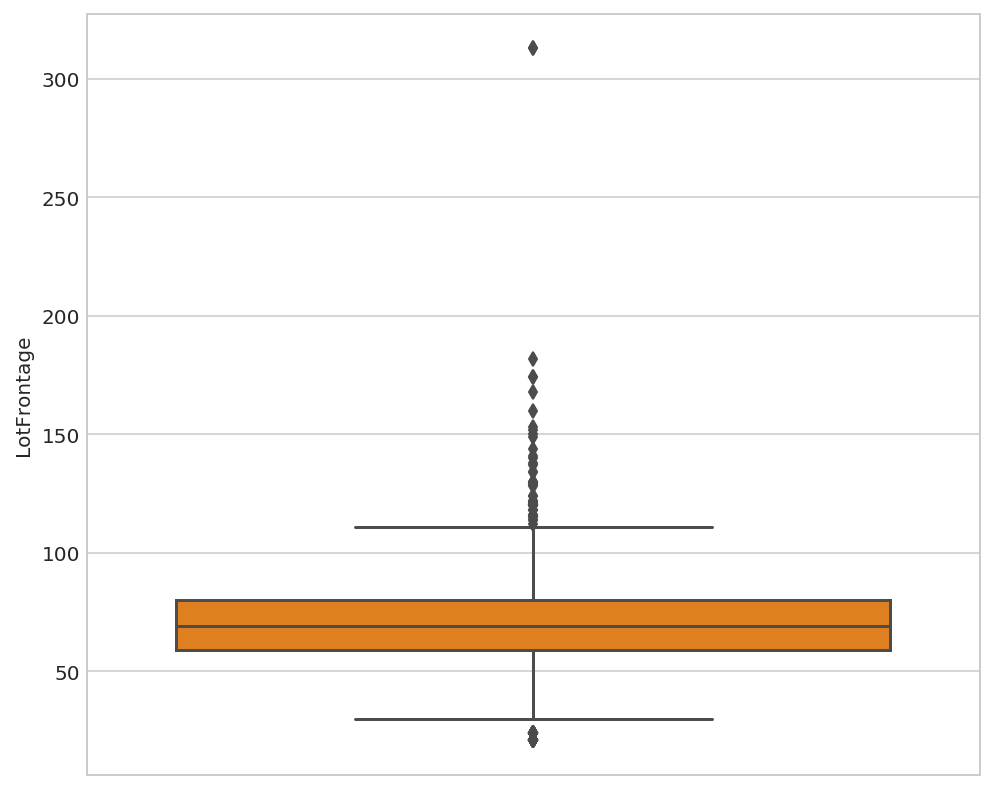

In [14]:
# Next step is to deal with the Null values:
# for columns with float type, we can fill in with 
# either the mean or median

plt.figure(figsize=(8,7))
sns.boxplot(y='LotFrontage',data=house,palette='autumn')

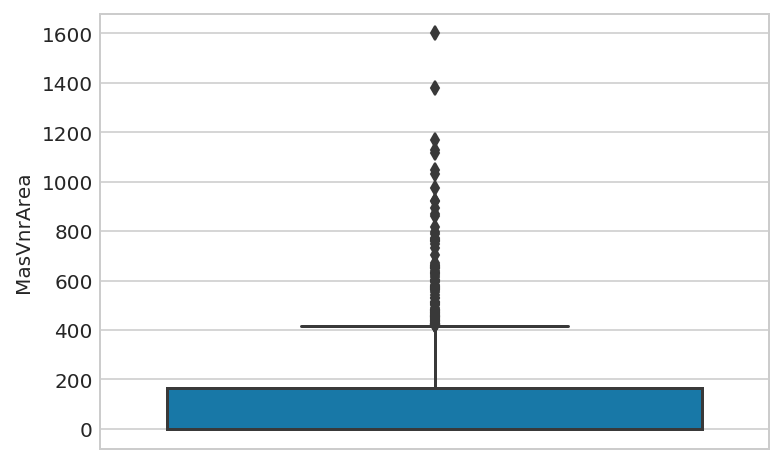

In [15]:
sns.boxplot(y='MasVnrArea',data=house,palette='winter')

In [16]:
house['MasVnrArea'].value_counts()

0.0       861
72.0        8
180.0       8
108.0       8
120.0       7
16.0        7
80.0        6
200.0       6
106.0       6
340.0       6
170.0       5
132.0       5
360.0       5
84.0        5
320.0       5
100.0       4
196.0       4
246.0       4
216.0       4
160.0       4
183.0       4
178.0       4
270.0       4
300.0       4
210.0       4
268.0       4
252.0       4
168.0       4
336.0       4
220.0       4
76.0        4
288.0       4
456.0       4
40.0        4
50.0        3
130.0       3
82.0        3
208.0       3
90.0        3
70.0        3
44.0        3
420.0       3
99.0        3
110.0       3
104.0       3
85.0        3
272.0       3
226.0       3
174.0       3
240.0       3
186.0       3
169.0       3
148.0       3
350.0       3
128.0       3
176.0       3
166.0       3
116.0       3
136.0       3
312.0       3
256.0       3
145.0       3
74.0        3
42.0        3
98.0        2
66.0        2
660.0       2
243.0       2
338.0       2
143.0       2
318.0       2
285.0 

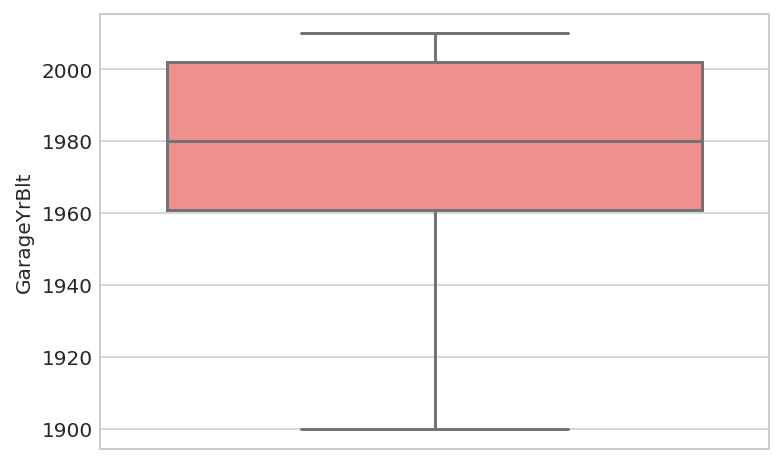

In [17]:
sns.boxplot(y='GarageYrBlt',data=house,palette='spring')

In [18]:
house['GarageYrBlt'].fillna(0,inplace=True)

In [19]:
# fillna in LotFrontage with the mean. 

mean1 = round(house['LotFrontage'].mean(),2) #round off to 2 decimal places

print(mean1)

# LotFrontage is linear square feet of street connected to property
# for LotFrontage, we can replace null values with the mean


70.05


In [20]:
house['LotFrontage'].fillna(mean1,inplace=True)

In [21]:
null_columns = house.columns[house.isnull().any()]
null_columns

house[house['MasVnrArea'].isnull()][null_columns]

# by looking at only Null values in MasVnrArea, we can conclude that
# missing values in MasVnrType are none, or that they don't have veneer
# thus we can safety replace all na values in MasVnrArea = 0



,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
234,NaN,NaN,NaN,Gd,TA,No,GLQ,Unf,SBrkr,TA,BuiltIn,Fin,TA,TA,NaN,NaN,NaN
529,NaN,NaN,NaN,TA,TA,No,Rec,Unf,SBrkr,TA,Attchd,RFn,TA,TA,NaN,NaN,NaN
650,NaN,NaN,NaN,Gd,TA,No,Unf,Unf,SBrkr,NaN,Attchd,RFn,TA,TA,NaN,NaN,NaN
936,NaN,NaN,NaN,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,RFn,TA,TA,NaN,NaN,NaN
973,NaN,NaN,NaN,Gd,TA,No,Unf,Unf,SBrkr,NaN,Attchd,Fin,TA,TA,NaN,NaN,NaN
977,Pave,NaN,NaN,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,Fin,TA,TA,NaN,NaN,NaN
1243,NaN,NaN,NaN,Ex,Gd,Gd,GLQ,Unf,SBrkr,Gd,Attchd,Fin,TA,TA,NaN,NaN,NaN
1278,NaN,NaN,NaN,Gd,TA,No,GLQ,Unf,SBrkr,Gd,Attchd,RFn,TA,TA,NaN,NaN,NaN


In [22]:
house['MasVnrArea'].fillna(0,inplace=True)

In [23]:
# After the above steps, we have managed to clean up the 3 columns (LotFrontage, GarageYrBlt, MasVnrArea) 
# of float data

In [24]:
#Next would be to clean up the other categorical columns, lets take a look again at the sum_isnull dataframe

In [25]:
e

,sum_isnull,data_type
LotFrontage,259,float64
Alley,1369,object
MasVnrType,8,object
MasVnrArea,8,float64
BsmtQual,37,object
BsmtCond,37,object
BsmtExposure,38,object
BsmtFinType1,37,object
BsmtFinType2,38,object
Electrical,1,object


In [26]:
house[house['BsmtExposure'].isnull()][null_columns]

,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
17,NaN,None,0.0,NaN,NaN,NaN,NaN,NaN,SBrkr,NaN,CarPort,Unf,TA,TA,NaN,NaN,Shed
39,NaN,None,0.0,NaN,NaN,NaN,NaN,NaN,FuseP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90,NaN,None,0.0,NaN,NaN,NaN,NaN,NaN,FuseA,NaN,Detchd,Unf,TA,TA,NaN,NaN,NaN
102,NaN,None,0.0,NaN,NaN,NaN,NaN,NaN,SBrkr,NaN,Attchd,Unf,TA,TA,NaN,NaN,NaN
156,NaN,None,0.0,NaN,NaN,NaN,NaN,NaN,FuseF,NaN,Detchd,Unf,TA,TA,NaN,NaN,NaN
182,NaN,BrkFace,98.0,NaN,NaN,NaN,NaN,NaN,SBrkr,Gd,Attchd,RFn,TA,TA,NaN,MnPrv,NaN
259,NaN,None,0.0,NaN,NaN,NaN,NaN,NaN,FuseA,NaN,Detchd,Unf,TA,TA,NaN,NaN,NaN
342,NaN,BrkFace,340.0,NaN,NaN,NaN,NaN,NaN,FuseA,NaN,Detchd,Unf,TA,TA,NaN,NaN,NaN
362,NaN,BrkFace,500.0,NaN,NaN,NaN,NaN,NaN,SBrkr,Ex,BuiltIn,RFn,TA,TA,NaN,NaN,NaN
371,NaN,None,0.0,NaN,NaN,NaN,NaN,NaN,SBrkr,Gd,Detchd,Fin,TA,TA,NaN,NaN,NaN


In [27]:
len(house[house['BsmtExposure'].isnull()][null_columns].index)

#above filtered dataframe has 38 rows

38

In [28]:
house.iloc[948,:]

#from the above dataframe we can find that the row with weird basement exposure value is row 949, thus we 
# take a closer look at this row only. 
# Realised that this house has a basement (as the other basement stats are present) but basement exposure is NA, 
# in this case, since this is the only row with this issue, it can be assume that there is an error in this data, 
# thus will drop this row

Id                   949
MSSubClass            60
MSZoning              RL
LotFrontage           65
LotArea            14006
Street              Pave
Alley                NaN
LotShape             IR1
LandContour          Lvl
Utilities         AllPub
LotConfig         Inside
LandSlope            Gtl
Neighborhood     CollgCr
Condition1          Norm
Condition2          Norm
BldgType            1Fam
HouseStyle        2Story
OverallQual            7
OverallCond            5
YearBuilt           2002
YearRemodAdd        2002
RoofStyle          Gable
RoofMatl         CompShg
Exterior1st      VinylSd
Exterior2nd      VinylSd
MasVnrType       BrkFace
MasVnrArea           144
ExterQual             Gd
ExterCond             TA
Foundation         PConc
BsmtQual              Gd
BsmtCond              TA
BsmtExposure         NaN
BsmtFinType1         Unf
BsmtFinSF1             0
BsmtFinType2         Unf
BsmtFinSF2             0
BsmtUnfSF            936
TotalBsmtSF          936
Heating             GasA


In [29]:
house[house['BsmtFinType2'].isnull()][null_columns]

#checking for BsmtFinType 1 and 2 as there is a mismatch no. of NaN values. (BsmtFinType1 has 37, while Type2 has 38)
#Examining the filtered dataframe below, the issue is the same as the BsmtExposure (in row index 332)
#Thus the way forward is to drop this row as the data has errors in it

,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
17,NaN,None,0.0,NaN,NaN,NaN,NaN,NaN,SBrkr,NaN,CarPort,Unf,TA,TA,NaN,NaN,Shed
39,NaN,None,0.0,NaN,NaN,NaN,NaN,NaN,FuseP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90,NaN,None,0.0,NaN,NaN,NaN,NaN,NaN,FuseA,NaN,Detchd,Unf,TA,TA,NaN,NaN,NaN
102,NaN,None,0.0,NaN,NaN,NaN,NaN,NaN,SBrkr,NaN,Attchd,Unf,TA,TA,NaN,NaN,NaN
156,NaN,None,0.0,NaN,NaN,NaN,NaN,NaN,FuseF,NaN,Detchd,Unf,TA,TA,NaN,NaN,NaN
182,NaN,BrkFace,98.0,NaN,NaN,NaN,NaN,NaN,SBrkr,Gd,Attchd,RFn,TA,TA,NaN,MnPrv,NaN
259,NaN,None,0.0,NaN,NaN,NaN,NaN,NaN,FuseA,NaN,Detchd,Unf,TA,TA,NaN,NaN,NaN
332,NaN,BrkFace,296.0,Gd,TA,No,GLQ,NaN,SBrkr,Gd,Attchd,RFn,TA,TA,NaN,NaN,NaN
342,NaN,BrkFace,340.0,NaN,NaN,NaN,NaN,NaN,FuseA,NaN,Detchd,Unf,TA,TA,NaN,NaN,NaN
362,NaN,BrkFace,500.0,NaN,NaN,NaN,NaN,NaN,SBrkr,Ex,BuiltIn,RFn,TA,TA,NaN,NaN,NaN


In [30]:
# For electrical, NaN seems to be an error as there are no valid
# NaN data as specified by the data dictionary
# Therefore, the decision would be to drop that row. 

house[house['Electrical'].isnull()][null_columns]

# from looking at the dataframe, the row to drop index to drop is 1379

,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
1379,NaN,None,0.0,Gd,TA,No,Unf,Unf,NaN,NaN,BuiltIn,Fin,TA,TA,NaN,NaN,NaN


In [31]:
house[house['GarageType'].isnull()][null_columns]

,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
39,NaN,None,0.0,NaN,NaN,NaN,NaN,NaN,FuseP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,NaN,None,0.0,TA,TA,No,Unf,Unf,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78,NaN,None,0.0,TA,TA,No,Unf,Unf,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88,NaN,None,0.0,TA,Fa,No,Unf,Unf,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,MnPrv,NaN
89,NaN,None,0.0,Gd,TA,No,GLQ,Unf,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,NaN,None,0.0,TA,TA,No,ALQ,Unf,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Shed
108,NaN,None,0.0,TA,TA,No,Unf,Unf,FuseF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,NaN,None,0.0,TA,TA,Av,GLQ,Unf,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127,NaN,None,0.0,TA,TA,No,LwQ,Unf,SBrkr,TA,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140,NaN,None,0.0,TA,TA,No,ALQ,Unf,SBrkr,Po,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
house[house['GarageType'].isnull()][null_columns].shape

# Above dataframe rows corresponds to the NaN values counted, replace all variables with Garagetype with null as NA.

(81, 17)

In [33]:
house['GarageYrBlt'].fillna(0,inplace=True)

#Fill in GarageYrBlt with 0 (no garage)
#And change the column datatype from float to int (as it is a year)

house.GarageYrBlt = house.GarageYrBlt.astype(int)

house.GarageYrBlt.dtypes

dtype('int64')

In [34]:
# LotFrontage NaN fill in with the mean value of the other data (already cleaned)
# Alley NaN = no alley access, replace as NA
# MasVnrType NaN = no veneer, replace as NA
# MasVnrArea NaN = no veneer, replace as 0 (already cleaned)
# BsmtQual NaN = no basement, replace as NA
# BsmtCond NaN = no basement, replace as NA
# BsmtExposure NaN = no basement, replace as NA (after dropping row 949 (index 948))
# BsmtFinType 1 and Type2 = no basement, replace as NA (after dropping row 333)(row index 332)
# Electrical column, the row to drop index to drop is 1379
# FireplaceQu NaN replace as NA (no fireplace)
# GarageYrBlt NaN filled in as 0 (already cleaned)
# GarageType, GarageFinish, GarageQual and GarageCond NaN replace as NA (no Garage)
# PoolQC NaN replace as NA (no pool)
# Fence NaN replace as NA (no fence)
# MiscFeature NaN replace as Na (no misc features)



In [35]:
# First drop the rows that was identified previously 
# Row index 332, 948 and 1379

house1 = house.drop(house.index[[332,948,1379]])




In [36]:
house1.shape

# confirmed that 3 rows are dropped (from 1460 to 1457 rows)

(1457, 81)

In [37]:
# for the rest of the columns and NaN values, it will be filled in with NA

house1.fillna('NA',inplace=True)

In [38]:
#checked if there are still NaN values

house1.isnull().sum()

#Below confirms that all NaN values are cleaned

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr

In [39]:
# reset_index after dropping columns to prevent errors:

house1.reset_index(drop=True, inplace=True)

### After cleaning data, part 2 is to remove any houses that are not residential
- Remove those rows with MSZoning A, C, FV and I

In [40]:
house1['MSZoning'].unique()

#Drop C (all) and FV

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [41]:
# Change the C (all) to C_(all)

In [42]:
house1['MSZoning'].replace('C (all)','C_all',inplace=True)

In [43]:
house1['MSZoning'].unique()

array(['RL', 'RM', 'C_all', 'FV', 'RH'], dtype=object)

In [44]:
indexNames = house1[(house1['MSZoning'] == 'C_all')].index
indexNames2 = house1[(house1['MSZoning'] == 'FV')].index
indexNames3 = indexNames.append(indexNames2)

house2 = house1.drop(indexNames3 , inplace=False)


In [45]:
house2['MSZoning'].unique()

#checking to ensure that all non-residential rows are dropped

array(['RL', 'RM', 'RH'], dtype=object)

### After dropping residential rows, next step would be to determine the fixed/non-renovatable features
#### Fixed/unchanged features:
1. MSubClass
2. MSZoning
3. LotFrontage
4. LotArea
5. Street
6. Alley
7. LotShape
8. LandContour
9. Utilities (unable to change as it depends on the supply from the state/area)
10. LotConfig
11. LandSlope
12. Neighborhood
13. Condition1
14. Condition2
15. BldgType (changing this will be a huge operation, or even rebuilding the entire property
16. HouseStyle (similar to BldgType)
17. YearBuilt
18. YearRemodAdd
19. RoofStyle (similar to BldgType)
20. Exterior1st (similar to BldgType)
21. Exterior2nd (similar to BldgType)
22. MasVnrArea (should be related to size of house, thus not changeable)
23. Foundation
24. BsmtQual (height of basement cannot change)
25. BsmtExposure (related to structure and layout of the house)
26. TotalBsmtSF
27. 1stFlrSF
28. 2ndFlrSF
29. GrLivArea (related to structure and layout of the house)
30. BsmtFullBath
31. BsmtHalfBath
32. FullBath
33. HalfBath (bathrooms technically can be added but require extensive work to route sewage piping and utilities 
connection and also to add more structure)
34. BedroomAbvGr (similar to bathroom)
35. Kitchen (similar to bathroom and bedroom)
36. TotalRmsAbvGrd (technically possible but require extensive work of adding new walls, partition and taking down 
walls etc)
37. Fireplace
38. GarageType
39. GarageYrBlt
40. GarageCars
41. GarageArea
42. WoodDeckSF (related to layout of house, although technically can be changed)
43. OpenPorchSF
44. EnclosedPorch
45. 3SsnPorch
46. ScreenPorch
47. PoolArea
48. MiscFeature
49. MiscVal
50. MoSold (data on selling)
51. YrSold (data on selling)
52. SaleType (data on selling
53. SaleCondition (data on selling)

#### Renovatable:
1. OverallQual
2. OverallCond
3. RoofMatl (can be changed, but can also be a fixed feature)
4. MasVnrType (can be changed as they are non structural loading, although this will be quite extensive renovation)
5. ExterQual
6. ExterCond
7. BsmtCond
8. BsmtFinType1
9. BsmtFinType2
10. BsmtFinSF1
11. BsmtFinSF2
12. BsmtUnfSF (can be renovated to complete the finishings)
13. Heating
14. HeatingQC
15. CentralAir (can be installed if there is none)
16. Electrical
17. LowQualFinSF
18. KitchenQual
19. Functional
20. FireplaceQu
21. GarageFinish
22. GarageQual
23. GarageCond
24. PavedDrive
25. PoolQC
26. Fence


In [46]:
house2.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [47]:
# reset_index after dropping non-residential property

house2.reset_index(drop=True, inplace=True)

In [48]:
# Next step would be to filter out the columns with the fixed variables
# and create 2 different dataframes with the respective columns 
# including the ID for referencing and SalePrice

house2_fixed = house2[['Id', 'MSSubClass', 'MSZoning', 
                      'LotFrontage', 'LotArea', 'Street',
                      'Alley', 'LotShape', 'LandContour', 
                      'Utilities', 'LotConfig','LandSlope', 
                      'Neighborhood', 'Condition1', 'Condition2', 
                      'BldgType','HouseStyle', 'YearBuilt', 'YearRemodAdd',
                      'RoofStyle','Exterior1st', 'Exterior2nd',
                      'MasVnrArea','Foundation','BsmtQual',
                      'BsmtExposure','TotalBsmtSF','1stFlrSF', 
                      '2ndFlrSF','GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 
                      'FullBath','HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
                      'TotRmsAbvGrd','Fireplaces','GarageType','GarageYrBlt',
                      'GarageCars','GarageArea','WoodDeckSF', 'OpenPorchSF',
                      'EnclosedPorch','3SsnPorch', 'ScreenPorch', 
                      'PoolArea','MiscFeature', 'MiscVal', 'MoSold', 
                      'YrSold', 'SaleType','SaleCondition','SalePrice']]

house2_reno = house2[['Id', 'OverallQual', 'OverallCond', 
                     'RoofMatl','MasVnrType', 
                     'ExterQual', 'ExterCond', 'BsmtFinType1',
                     'BsmtCond','BsmtFinSF1','BsmtFinType2', 'BsmtFinSF2', 
                     'BsmtUnfSF','Heating','HeatingQC', 'CentralAir', 
                     'Electrical', 'LowQualFinSF', 'KitchenQual',
                     'Functional', 'FireplaceQu', 'GarageFinish', 
                     'GarageQual','GarageCond', 
                     'PavedDrive', 'PoolQC','Fence','SalePrice']]



In [49]:
house2_fixed.shape

#53 variables + Id and SalePrice column

(1382, 55)

In [50]:
house2_fixed.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrArea,Foundation,BsmtQual,BsmtExposure,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,2003,2003,Gable,VinylSd,VinylSd,196.0,PConc,Gd,No,856,856,854,1710,1,0,2,1,3,1,8,0,Attchd,2003,2,548,0,61,0,0,0,0,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,1976,1976,Gable,MetalSd,MetalSd,0.0,CBlock,Gd,Gd,1262,1262,0,1262,0,1,2,0,3,1,6,1,Attchd,1976,2,460,298,0,0,0,0,0,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,2001,2002,Gable,VinylSd,VinylSd,162.0,PConc,Gd,Mn,920,920,866,1786,1,0,2,1,3,1,6,1,Attchd,2001,2,608,0,42,0,0,0,0,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,1915,1970,Gable,Wd Sdng,Wd Shng,0.0,BrkTil,TA,No,756,961,756,1717,1,0,1,0,3,1,7,1,Detchd,1998,3,642,0,35,272,0,0,0,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,2000,2000,Gable,VinylSd,VinylSd,350.0,PConc,Gd,Av,1145,1145,1053,2198,1,0,2,1,4,1,9,1,Attchd,2000,3,836,192,84,0,0,0,0,NA,0,12,2008,WD,Normal,250000


In [51]:
house2_reno.shape

#26 variables + Id and SalePrice column

(1382, 28)

In [52]:
house2_reno.head()

,Id,OverallQual,OverallCond,RoofMatl,MasVnrType,ExterQual,ExterCond,BsmtFinType1,BsmtCond,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Heating,HeatingQC,CentralAir,Electrical,LowQualFinSF,KitchenQual,Functional,FireplaceQu,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,SalePrice
0,1,7,5,CompShg,BrkFace,Gd,TA,GLQ,TA,706,Unf,0,150,GasA,Ex,Y,SBrkr,0,Gd,Typ,NA,RFn,TA,TA,Y,NA,NA,208500
1,2,6,8,CompShg,None,TA,TA,ALQ,TA,978,Unf,0,284,GasA,Ex,Y,SBrkr,0,TA,Typ,TA,RFn,TA,TA,Y,NA,NA,181500
2,3,7,5,CompShg,BrkFace,Gd,TA,GLQ,TA,486,Unf,0,434,GasA,Ex,Y,SBrkr,0,Gd,Typ,TA,RFn,TA,TA,Y,NA,NA,223500
3,4,7,5,CompShg,None,TA,TA,ALQ,Gd,216,Unf,0,540,GasA,Gd,Y,SBrkr,0,Gd,Typ,Gd,Unf,TA,TA,Y,NA,NA,140000
4,5,8,5,CompShg,BrkFace,Gd,TA,GLQ,TA,655,Unf,0,490,GasA,Ex,Y,SBrkr,0,Gd,Typ,TA,RFn,TA,TA,Y,NA,NA,250000


### Generate a 'mini' dataframe with the properties of the categoical columns

In [53]:
# Create a dataframe on the column properties of 
# house2_fixed
# adding in both dtypes and nunique count properties

data_type = house2_fixed.dtypes

a1 = pd.DataFrame(data_type,columns=['Data_type'])

nunique = house2_fixed.nunique()

a1 = pd.concat([a1,nunique],axis=1)


a1 = a1.rename(index=str,columns={0:'Unique_count'})

a1[a1['Data_type'] == 'object']
# Only interested in columns that are categorical/objects

#shows and filter only the columns which are categorical
#and number of unique categories in each column
#Useful to check get_dummies dataframe to ensure that
#correct number of columns are generated

,Data_type,Unique_count
MSZoning,object,3
Street,object,2
Alley,object,3
LotShape,object,4
LandContour,object,4
Utilities,object,2
LotConfig,object,5
LandSlope,object,3
Neighborhood,object,25
Condition1,object,9


In [54]:
# from above table, the total

a1.groupby('Data_type').sum()

#There are 161 unique categories in all the categorical columns

,Unique_count
Data_type,
int64,7182
float64,430
object,161


In [55]:
a1[a1['Data_type'] == 'object'].shape

# 23 categorical columns

(23, 2)

In [56]:
# when using get_dummies, the reference column will be dropped, 
# Thus total, the get_dummies function will add 161 - 23 = 138 columns


### Next step is to generate dummy variables on house2_fixed

In [57]:
house2_fixed_dummies = pd.get_dummies(house2_fixed,drop_first=True)

In [58]:
house2_fixed_dummies.shape

(1382, 170)

In [59]:
house2_fixed_dummies.head(3)

,Id,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NA,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NA,BsmtExposure_No,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,MiscFeature_NA,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,2003,2003,196.0,856,856,854,1710,1,0,2,1,3,1,8,0,2003,2,548,0,61,0,0,0,0,0,2,2008,208500,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,2,20,80.0,9600,1976,1976,0.0,1262,1262,0,1262,0,1,2,0,3,1,6,1,1976,2,460,298,0,0,0,0,0,0,5,2007,181500,1,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,3,60,68.0,11250,2001,2002,162.0,920,920,866,1786,1,0,2,1,3,1,6,1,2001,2,608,0,42,0,0,0,0,0,9,2008,223500,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [60]:
# As seen above, the original house2_fixed dataframe
# has 55 columns (including Id and SalePrice)
# Deducting 23 reference columns = 55 - 23 = 32
# Adding 138 columns of dummy variables = 32 + 138 = 170
# Same as the number of columns generated after get_dummies function
# CHECKED

### Next step is to generate dummy variables on house2_reno (for Qn2)

In [61]:
house2_reno_dummies = pd.get_dummies(house2_reno,drop_first=True)

In [62]:
house2_reno_dummies.shape

(1382, 92)

In [63]:
house2_reno.shape

(1382, 28)

In [64]:
# Create a dataframe on the column properties of 
# house2_reno
# adding in both dtypes and nunique count properties

data_type = house2_reno.dtypes

b1 = pd.DataFrame(data_type,columns=['Data_type'])

nunique = house2_reno.nunique()

b1 = pd.concat([b1,nunique],axis=1)


b1 = b1.rename(index=str,columns={0:'Unique_count'})

b1[b1['Data_type'] == 'object']
# Only interested in columns that are categorical/objects

#shows and filter only the columns which are categorical
#and number of unique categories in each column
#Useful to check get_dummies dataframe to ensure that
#correct number of columns are generated

,Data_type,Unique_count
RoofMatl,object,8
MasVnrType,object,5
ExterQual,object,4
ExterCond,object,5
BsmtFinType1,object,7
BsmtCond,object,5
BsmtFinType2,object,7
Heating,object,6
HeatingQC,object,5
CentralAir,object,2


In [65]:
# from above table, the total

b1.groupby('Data_type').sum()

#There are 104 unique categories in all the categorical columns in house_reno

,Unique_count
Data_type,
int64,3570
object,104


In [66]:
b1[b1['Data_type'] == 'object'].shape

# 20 categorical columns

(20, 2)

In [67]:
# As seen above, the original house2_reno dataframe
# has 28 columns (including Id and SalePrice)
# Deducting 20 reference columns = 28 - 20 = 8
# when using get_dummies, the reference column will be dropped, 
# Thus total, the get_dummies function will add 104 - 20 = 84 columns
# Adding 84 columns of dummy variables = 84 + 8 = 92
# Same as the number of columns generated after get_dummies function
# CHECKED

### Next would be to split house2_fixed into pre and post 2010 sale date
- Pre_2010 will be train data set, Post_2010 will be test data set
- Followed by transforming the data using standardscaler


In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler


# Train data
X_train = house2_fixed_dummies[house2_fixed_dummies['YrSold']<2010].drop(columns=['SalePrice','Id'])
y_train = house2_fixed_dummies[house2_fixed_dummies['YrSold']<2010][['SalePrice']]

# Test data
X_test = house2_fixed_dummies[house2_fixed_dummies['YrSold']==2010].drop(columns=['SalePrice','Id'])
y_test = house2_fixed_dummies[house2_fixed_dummies['YrSold']==2010][['SalePrice']]
    
    

In [69]:
def Standard_scaler(X_train, X_test, y_train, y_test):
    '''
    Function which takes in X_train and X_test and scales data.
    - Returns standard scaled features.
    '''
    # Scale data
    
    ss = StandardScaler()
    Xs_train = ss.fit_transform(X_train)
    Xs_test = ss.transform(X_test) 
    
    return Xs_train, Xs_test, y_train, y_test

In [70]:
Standard_scaler(X_train, X_test, y_train, y_test)

(array([[ 0.11684201, -0.23895098, -0.21599911, ..., -0.12247449,
          0.46036974, -0.29415962],
        [-0.87144667,  0.43756642, -0.10747312, ..., -0.12247449,
          0.46036974, -0.29415962],
        [ 0.11684201, -0.1036475 ,  0.04823809, ..., -0.12247449,
          0.46036974, -0.29415962],
        ...,
        [-0.87144667,  0.88857802,  0.61134643, ..., -0.12247449,
         -2.17216709, -0.29415962],
        [ 0.11684201, -0.37425446, -0.26629855, ..., -0.12247449,
          0.46036974, -0.29415962],
        [-0.87144667,  0.21206062, -0.07567028, ..., -0.12247449,
          0.46036974, -0.29415962]]),
 array([[-0.87144667, -0.01119012,  0.04738875, ..., -0.12247449,
          0.46036974, -0.29415962],
        [-0.87144667, -0.01119012, -0.23525068, ..., -0.12247449,
          0.46036974, -0.29415962],
        [-0.87144667, -0.46445678, -0.33396214, ..., -0.12247449,
          0.46036974, -0.29415962],
        ...,
        [-0.87144667,  0.66307222,  0.22990116, ..., -

In [71]:
print(X_test.shape)
print(X_train.shape)
print(y_test.shape)
print(y_train.shape)


(164, 168)
(1218, 168)
(164, 1)
(1218, 1)


### 1. Fitting Simple Linear Regression model

In [72]:
#from sklearn.linear_model import LinearRegression

lm = LinearRegression()
model = lm.fit(X_train, y_train)

In [73]:
print('Intercept is:',lm.intercept_)

cdf = pd.DataFrame(lm.coef_.T,X_train.columns,columns=['Coefficient'])

Intercept is: [1093430.1587503]


In [74]:
cdf

,Coefficient
MSSubClass,-2.666788e+01
LotFrontage,-1.728715e+02
LotArea,6.642442e-01
YearBuilt,1.669161e+02
YearRemodAdd,3.102835e+02
MasVnrArea,1.904899e+01
TotalBsmtSF,8.000966e+00
1stFlrSF,-3.358360e+00
2ndFlrSF,2.660845e+01
GrLivArea,4.627779e+01


In [75]:
# Predict Test Data (Post_2010):

predicted_y = lm.predict(X_test)

#### Visualising the Residual with a histogram

/Users/jeremy/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/Users/jeremy/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


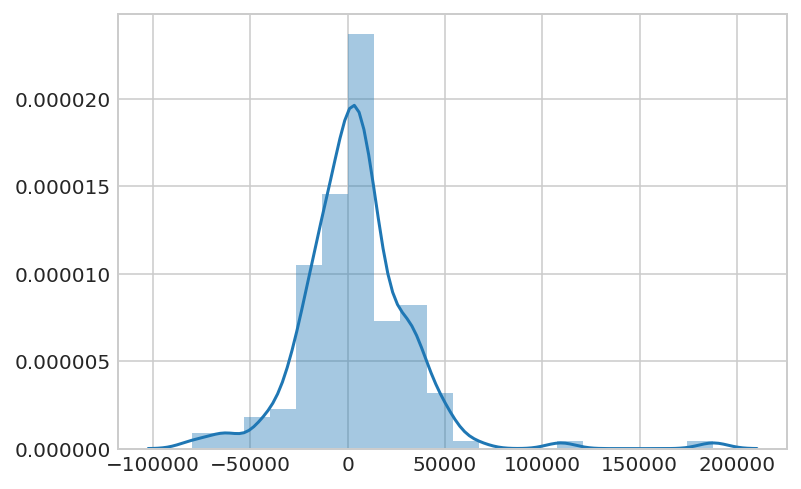

In [76]:
sns.distplot((y_test-predicted_y),bins=20)

#### Scatterplot of predicted_y vs y_test and calculating the R^2 score

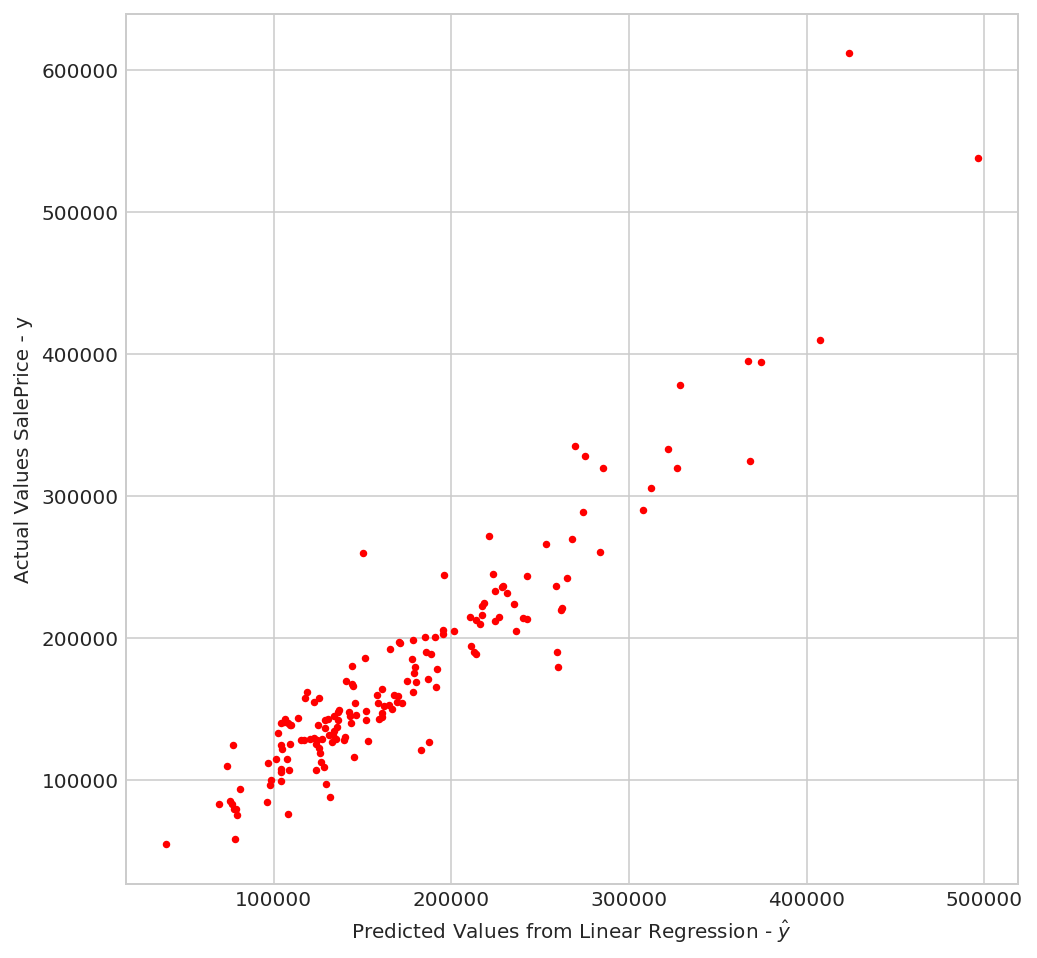

R^2 score:  0.8724155420732758


In [77]:

predicted_y  =  model.predict(X_test) 

score =  lm.score(X_test, y_test)

# Plot the model
plt.figure(figsize=(8,8))
plt.scatter(predicted_y, y_test, s=30, c='r', marker='.', zorder=20)
plt.xlabel("Predicted Values from Linear Regression - $\hat{y}$")
plt.ylabel("Actual Values SalePrice - y")
plt.show()

print("R^2 score: ", score)

In [78]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predicted_y))
print('MSE:', metrics.mean_squared_error(y_test, predicted_y))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predicted_y)))

MAE: 19216.02754060291
MSE: 836009357.794288
RMSE: 28913.826412190552


#### Running a cross test validation on the pre_2010 data

In [79]:
from sklearn.cross_validation import cross_val_score,cross_val_predict

/Users/jeremy/anaconda3/lib/python3.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [80]:
# Perform a 10-fold cross validation on the Pre_2010 data
scores = cross_val_score(model, X_test, y_test, cv=10)
print ("Cross-validated scores:",scores)

Cross-validated scores: [-1.41701553 -0.72387154 -0.10341405 -0.17538777 -0.87586463  0.20318572
  0.61188826  0.15612004 -1.87948178 -1.46959063]


Cross-Predicted R2: -0.2353396474981393


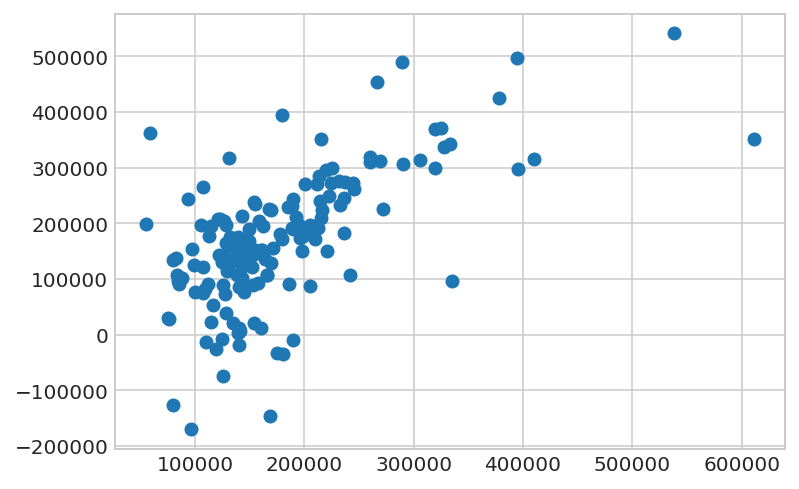

In [81]:
# Make cross validated predictions on the test sets
predictions = cross_val_predict(model, X_test, y_test, cv=10)
plt.scatter(y_test, predictions)

# manually calcualte the r2
r2 = metrics.r2_score(y_test, predictions)
print ("Cross-Predicted R2:", r2)

Above cross validated scores shows that the simple linear regression may not be the best model to predict the price even though the initial model fitting without cross validation 
gives a R^2 score of 0.87

### 2. Fitting a Ridge Regression

#### Determining Coefficients for 3 different alpha values

In [82]:
from sklearn.linear_model import Ridge

def ridge_coefs(X_test, y_test, alphas):
    
    # Set up the list to hold the different sets of coefficients.
    coefs = []
    
    # Set up a ridge regression object.
    ridge_reg = Ridge()
    
    # Iterate through the alphas fed into the function.
    for a in alphas:
        
        # On each alpha, reset the ridge model's alpha to the current one.
        ridge_reg.set_params(alpha=a)
        
        # Fit or refit the model on the provided X, Y.
        ridge_reg.fit(X_test, y_test)
        
        # Get out the coefficient list.
        coefs.append(a)
        coefs.append(ridge_reg.coef_)
        
    return coefs

In [83]:
ridge_coefs(X_train,y_train, alphas=(0.1,1,10))

[0.1, array([[-3.54111701e+01, -1.68247040e+02,  6.53004935e-01,
          1.54805624e+02,  3.05603890e+02,  1.87948950e+01,
          8.05657040e+00, -3.50500735e+00,  2.64674649e+01,
          4.66246328e+01,  1.06422280e+04,  6.87683332e+03,
          7.69367381e+03,  3.87574582e+03, -5.37051276e+03,
         -1.81883042e+04,  1.85088903e+03,  6.65815663e+03,
         -3.16283545e+01,  1.30649365e+04, -3.91947816e+00,
          1.60779642e+01,  5.22992130e-01,  1.01601966e+00,
          6.22147989e+01,  5.84761147e+01,  2.99410178e+01,
          1.01424537e+00, -3.09859297e+02, -8.30691541e+02,
         -2.01710061e+03, -3.48096414e+03,  3.32896103e+04,
         -1.78631270e+03,  1.35578706e+04,  1.21284036e+04,
         -3.28000152e+04,  5.91557243e+02,  1.83536560e+04,
          5.75757497e+03,  1.31419665e+04, -3.58436421e+04,
          5.61157749e+03, -1.37236749e+04, -1.86134398e+04,
         -1.77283050e+02,  6.60315067e+02, -3.23791488e+04,
         -1.12281911e+03,  3.197032

#### Fitting Ridge model with 3 different alpha values

In [84]:
lm_ridge_d1 = Ridge(alpha=0.1)  #d1 stands for alpha of 0.1
lm_ridge_1 = Ridge(alpha=1) #alpha of 1
lm_ridge_10 = Ridge(alpha=10) #alpha of 10


In [85]:
# Fit the models on the train data

lm_ridge_d1.fit(X_train, y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [86]:
lm_ridge_1.fit(X_train, y_train)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [87]:
lm_ridge_10.fit(X_train, y_train)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

#### Evaluating models using R^2

In [88]:
# Evaluate the different alphas used for each Ridge regression model by R^2 value:

print("R^2 value for Ridge, alpha = 0.1 is",np.round((lm_ridge_d1.score(X_train,y_train)),3))
print("R^2 value for Ridge, alpha = 1.0 is",np.round((lm_ridge_1.score(X_train,y_train)),3))
print("R^2 value for Ridge, alpha = 10.0 is",np.round((lm_ridge_10.score(X_train,y_train)),3))

R^2 value for Ridge, alpha = 0.1 is 0.877
R^2 value for Ridge, alpha = 1.0 is 0.875
R^2 value for Ridge, alpha = 10.0 is 0.862


#### Fitting the best performing model onto the test data set

In [89]:
# Highest R^2 is Ridge with alpha or 0.1

predicted_ridge_d1 = lm_ridge_d1.predict(X_test)

#### Visualising the predicted vs actual SalePrice on a plot

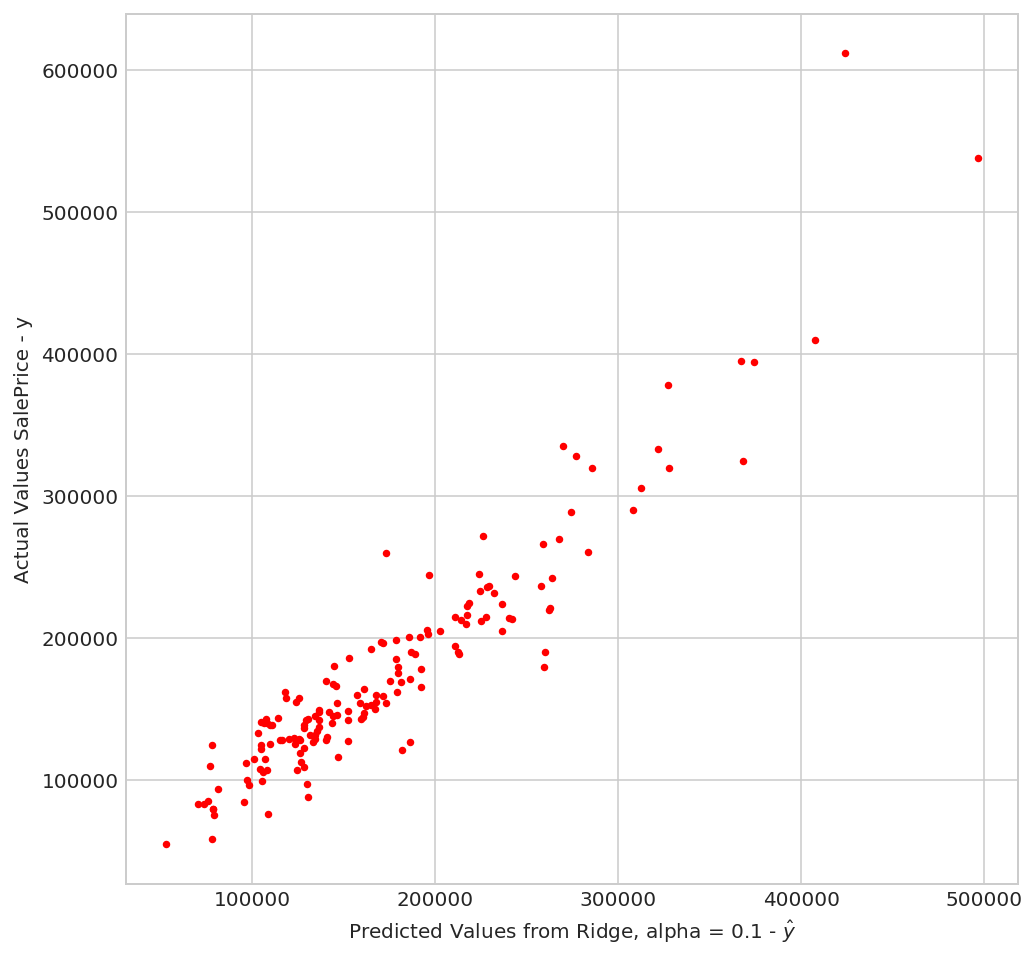

R^2 score:  0.8785527147947203


In [90]:
predicted_ridge_d1  =  lm_ridge_d1.predict(X_test) 

score =  lm_ridge_d1.score(X_test, y_test)

# Plot the model
plt.figure(figsize=(8,8))
plt.scatter(predicted_ridge_d1, y_test, s=30, c='r', marker='.', zorder=20)
plt.xlabel("Predicted Values from Ridge, alpha = 0.1 - $\hat{y}$")
plt.ylabel("Actual Values SalePrice - y")
plt.show()

print("R^2 score: ", score)

The R^2 for the test data is better than the training set (R^2 of 0.877) and the simple linear regression model (R^2: 0.872)

#### Try to run a Kfold = 10 Cross validation for this model to compare its performance with the simple linear regression

In [91]:
scores = cross_val_score(lm_ridge_d1, X_train, y_train, cv=10)
print("Cross-validated scores:",scores)
print('Average R^2: ',np.round(np.mean(scores),3))

Cross-validated scores: [0.87308415 0.82314422 0.86665925 0.73676411 0.8392566  0.71968704
 0.87107303 0.78645227 0.561338   0.82646656]
Average R^2:  0.79


Simple liner regression scores: 

Cross-validated scores: [-1.41701553 -0.72387154 -0.10341405 -0.17538777 -0.87586463  0.20318572
  0.61188826  0.15612004 -1.87948178 -1.46959063]

As can be seen from the score comparison, the Ridge model has a much better performance as it does not have any negative R^2 values and its average R^2 is 0.79

Cross-Predicted R2: 0.6092186298224584


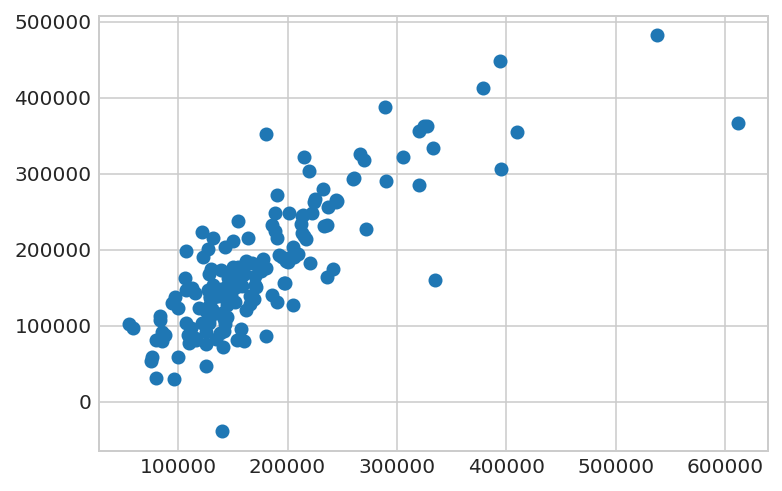

In [92]:
# Make cross validated predictions on the test sets
predicted_ridge = cross_val_predict(lm_ridge_d1, X_test, y_test, cv=10)
plt.scatter(y_test, predicted_ridge)

# manually calcualte the r2
r2 = metrics.r2_score(y_test, predicted_ridge)
print ("Cross-Predicted R2:", r2)

/Users/jeremy/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/Users/jeremy/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


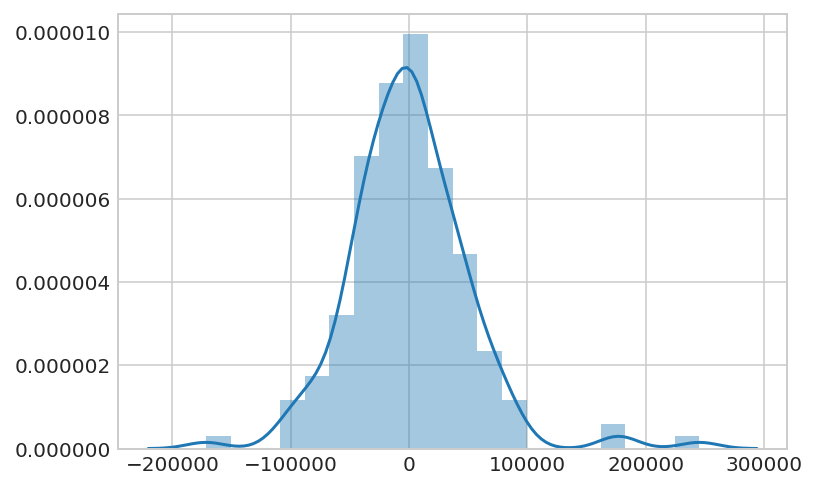

In [93]:
sns.distplot((y_test-predicted_ridge),bins=20)

The cross validated model works much better as compared to simple linear regression and the residual plots look more normally distributed

In [94]:
# Loss Function of Ridge regression

print('MAE:', metrics.mean_absolute_error(y_test, predicted_ridge))
print('MSE:', metrics.mean_squared_error(y_test, predicted_ridge))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predicted_ridge)))

MAE: 36178.44769665266
MSE: 2560632287.2628474
RMSE: 50602.690514070964


In [95]:
# Loss Function of Simple Linear Regression

print('MAE:', metrics.mean_absolute_error(y_test, predicted_y))
print('MSE:', metrics.mean_squared_error(y_test, predicted_y))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predicted_y)))

MAE: 19216.02754060291
MSE: 836009357.794288
RMSE: 28913.826412190552


Even though the loss function is larger, the fit of the simple linear regression model is very poor as compared to the Ridge model

## Conclusion for Qn1: From all the analysis and modelling, the best model is Ridge regression with alpha value of 0.1

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Determine any value of *changeable* property characteristics unexplained by the *fixed* ones.

---

Now that you have a model that estimates the price of a house based on its static characteristics, we can move forward with part 2 and 3 of the plan: what are the costs/benefits of quality, condition, and renovations?

There are two specific requirements for these estimates:
1. The estimates of effects must be in terms of dollars added or subtracted from the house value. 
2. The effects must be on the variance in price remaining from the first model.

The residuals from the first model (training and testing) represent the variance in price unexplained by the fixed characteristics. Of that variance in price remaining, how much of it can be explained by the easy-to-change aspects of the property?

---

**Your goals:**
1. Evaluate the effect in dollars of the renovate-able features. 
- How would your company use this second model and its coefficients to determine whether they should buy a property or not? Explain how the company can use the two models you have built to determine if they can make money. 
- Investigate how much of the variance in price remaining is explained by these features.
- Do you trust your model? Should it be used to evaluate which properties to buy and fix up?

### 1. Split the renovatable data into train and test data

In [96]:
house2_reno_dummies.shape

(1382, 92)

In [97]:
# First must add back the YrSold column as it was placed in the fixed feature
# Add back the column so it can be filtered
# After filtering, remove from the dataframes

In [98]:
house2_reno_dummies = pd.concat([house2_reno_dummies,house2_fixed['YrSold']],axis=1)

In [99]:
house2_reno_dummies.shape

#confirm that column has been added

(1382, 93)

In [100]:
house2_reno_dummies.info()

#ensure concat function did not add any NaN values due to mismatched index

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1382 entries, 0 to 1381
Data columns (total 93 columns):
Id                    1382 non-null int64
OverallQual           1382 non-null int64
OverallCond           1382 non-null int64
BsmtFinSF1            1382 non-null int64
BsmtFinSF2            1382 non-null int64
BsmtUnfSF             1382 non-null int64
LowQualFinSF          1382 non-null int64
SalePrice             1382 non-null int64
RoofMatl_CompShg      1382 non-null uint8
RoofMatl_Membran      1382 non-null uint8
RoofMatl_Metal        1382 non-null uint8
RoofMatl_Roll         1382 non-null uint8
RoofMatl_Tar&Grv      1382 non-null uint8
RoofMatl_WdShake      1382 non-null uint8
RoofMatl_WdShngl      1382 non-null uint8
MasVnrType_BrkFace    1382 non-null uint8
MasVnrType_NA         1382 non-null uint8
MasVnrType_None       1382 non-null uint8
MasVnrType_Stone      1382 non-null uint8
ExterQual_Fa          1382 non-null uint8
ExterQual_Gd          1382 non-null uint8
ExterQual_T

In [101]:
house2_reno_dummies.head(5)

,Id,OverallQual,OverallCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,LowQualFinSF,SalePrice,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,MasVnrType_BrkFace,MasVnrType_NA,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtCond_Gd,BsmtCond_NA,BsmtCond_Po,BsmtCond_TA,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_NA,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_NA,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_NA,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NA,YrSold
0,1,7,5,706,0,150,0,208500,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,2008
1,2,6,8,978,0,284,0,181500,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,2007
2,3,7,5,486,0,434,0,223500,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,2008
3,4,7,5,216,0,540,0,140000,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,2006
4,5,8,5,655,0,490,0,250000,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,2008


In [102]:
# Train data
X_train = house2_reno_dummies[house2_reno_dummies['YrSold']<2010].drop(columns=['SalePrice','Id'])
y_train = house2_reno_dummies[house2_reno_dummies['YrSold']<2010][['SalePrice']]

# Test data
X_test = house2_reno_dummies[house2_reno_dummies['YrSold']==2010].drop(columns=['SalePrice','Id'])
y_test = house2_reno_dummies[house2_reno_dummies['YrSold']==2010][['SalePrice']]


In [103]:
X_train.shape

(1218, 91)

In [104]:
X_test.shape

(164, 91)

In [105]:
house2_reno_dummies.groupby('YrSold').count()

# To verify that there are 164 houses sold in 2010 (X_test number of rows)

,Id,OverallQual,OverallCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,LowQualFinSF,SalePrice,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,MasVnrType_BrkFace,MasVnrType_NA,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NA,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtCond_Gd,BsmtCond_NA,BsmtCond_Po,BsmtCond_TA,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NA,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_NA,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_NA,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_NA,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NA
YrSold,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2006,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298
2007,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313,313
2008,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287,287
2009,320,320,320,320,320,320,320,320,320,320,320,320,320,320,320,320,320,320,320,320,320,320,320,320,320,320,320,320,320,320,320,320,320,320,320,320,320,320,320,320,320,320,320,320,320,320,320,320,320,320,320,320,320,320,320,320,320,320,320,320,320,320,320,320,320,320,320,320,320,320,320,320,320,320,320,320,320,320,320,320,320,320,320,320,320,320,320,320,320,320,320,320
2010,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164,164


In [106]:
# After ensuring that the dataframe is correctly split, next is to drop the YrSold column

In [107]:
X_train.drop(columns='YrSold',inplace=True)
X_test.drop(columns='YrSold',inplace=True)

In [108]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

#check to ensure that YrSold has been dropped

(1218, 90)
(164, 90)
(1218, 1)
(164, 1)


### 1. Using the ridge regression model in question 1 to analyse the renovatable features:


### Fitting the model to the train data

In [109]:
lm_ridge_d1.fit(X_train, y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [110]:
print("R^2 value for Ridge, alpha = 0.1 is",np.round((lm_ridge_d1.score(X_train,y_train)),3))


R^2 value for Ridge, alpha = 0.1 is 0.784


In [111]:
predicted_ridge_d1 = lm_ridge_d1.predict(X_test)

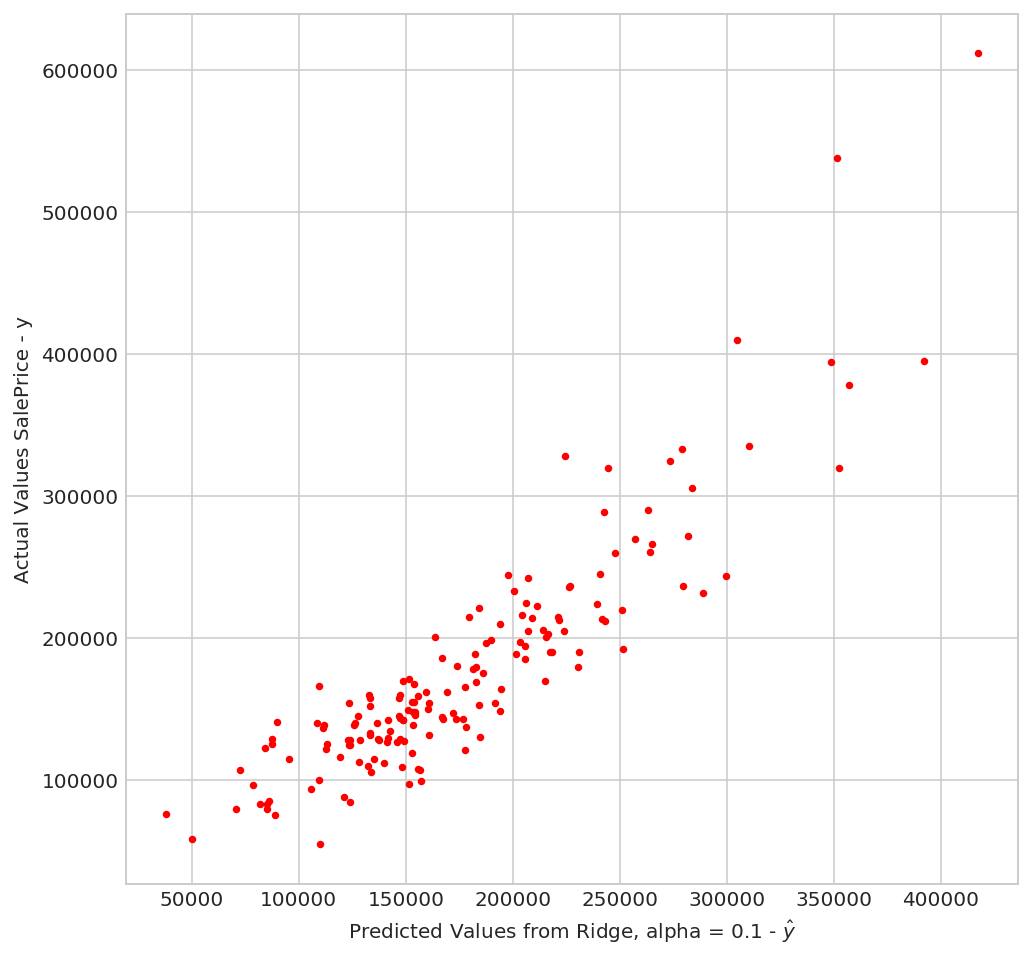

R^2 score:  0.8023848510680397


In [112]:
predicted_ridge_d1  =  lm_ridge_d1.predict(X_test) 

score =  lm_ridge_d1.score(X_test, y_test)

# Plot the model
plt.figure(figsize=(8,8))
plt.scatter(predicted_ridge_d1, y_test, s=30, c='r', marker='.', zorder=20)
plt.xlabel("Predicted Values from Ridge, alpha = 0.1 - $\hat{y}$")
plt.ylabel("Actual Values SalePrice - y")
plt.show()

print("R^2 score: ", score)

In [113]:
scores = cross_val_score(lm_ridge_d1, X_train, y_train, cv=10)
print("Cross-validated scores:",scores)
print('Average R^2: ',np.round(np.mean(scores),3))

Cross-validated scores: [0.62460055 0.59143923 0.82538553 0.6869464  0.76123812 0.72728763
 0.71733315 0.68908761 0.30684159 0.70122994]
Average R^2:  0.663


/Users/jeremy/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/Users/jeremy/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


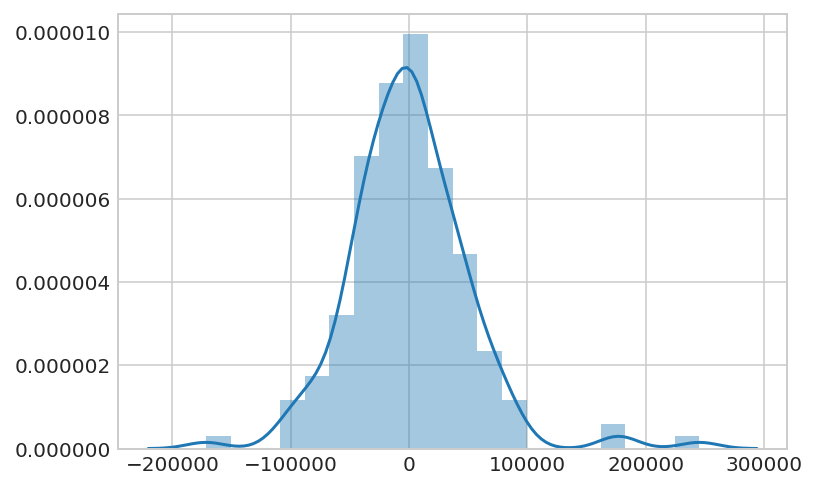

In [114]:
sns.distplot((y_test-predicted_ridge),bins=20)

In [115]:
print('MAE:', metrics.mean_absolute_error(y_test, predicted_ridge))
print('MSE:', metrics.mean_squared_error(y_test, predicted_ridge))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predicted_ridge)))

MAE: 36178.44769665266
MSE: 2560632287.2628474
RMSE: 50602.690514070964


In [116]:
## Show coefficients for the model

coefficients = pd.DataFrame(lm_ridge_d1.coef_,columns=X_train.columns).T
coefficients

,0
OverallQual,22179.047070
OverallCond,5043.789752
BsmtFinSF1,55.726846
BsmtFinSF2,52.983428
BsmtUnfSF,35.288111
LowQualFinSF,-3.006154
RoofMatl_CompShg,260067.098326
RoofMatl_Membran,241579.514819
RoofMatl_Metal,239119.688076
RoofMatl_Roll,254820.806424


In [117]:
residual = np.abs(y_test-predicted_ridge)

print('residual_mean:',residual.mean())

average_house_price = y_test.mean()

print('average_house_price:',average_house_price)


residual_mean: SalePrice    36178.447697
dtype: float64
average_house_price: SalePrice    177820.878049
dtype: float64


### Conclusion:

#### **2a**. Evaluate the effect in dollars of the renovatable features.

The mean residual values (amount that cannot be described by renovatable features) is rather significant (about 20% of the average house price)

This is the effect in terms of dollars on the renovatable features


#### **2b**. How would your company use this second model and its coefficients to determine whether they should buy a property or not? Explain how the company can use the two models you have built to determine if they can make money. 

The model in Qn2 can be used to determine which renovatable features can predict the house price better than the fixed features

Based on the cost required to renovate the desired feature and comparing it to the predicted amount that can improve its sales value.
Using this model, the company can judge if it is worth it to buy the property over and do a renovation to increase its Saleprice and make a profit from it. 

The fixed feature model can be used to determine if a house has good potential for sale as some fixed features may be in higher demand from buyers and thus will have more value

After looking at the fixed features, they can use the model in Qn2 to focus on the houses that have more potential after renovation and spend its resources on those houses

#### **2c.** Investigate how much of the variance in price remaining is explained by these features.

The variance in price remaining can be determined by looking at the coefficients of the features. For example, a unit change in Overall quality will improve sale price by 22179 units

#### **2d.** Do you trust your model? Should it be used to evaluate which properties to buy and fix up?

Based on the R-squared, the ridge model in Qn1 is about 0.61 and in Qn2 is 0.66. Based on the R-squared scores, the model may not be very reliable in evaluating which properties to buy and fix up as there is a relatively large percent of error in prediction of price based on fixed and renovatable features.

However, this approach can be combined with market evaluation on which features are most sought after by potential home owners. Combining this buyer demand data may improve the model further.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. What property characteristics predict an "abnormal" sale?

---

The `SaleCondition` feature indicates the circumstances of the house sale. From the data file, we can see that the possibilities are:

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)
       
One of the executives at your company has an "in" with higher-ups at the major regional bank. His friends at the bank have made him a proposal: if he can reliably indicate what features, if any, predict "abnormal" sales (foreclosures, short sales, etc.), then in return the bank will give him first dibs on the pre-auction purchase of those properties (at a dirt-cheap price).

He has tasked you with determining (and adequately validating) which features of a property predict this type of sale. 

---

**Your task:**
1. Determine which features predict the `Abnorml` category in the `SaleCondition` feature.
- Justify your results.

This is a challenging task that tests your ability to perform classification analysis in the face of severe class imbalance. You may find that simply running a classifier on the full dataset to predict the category ends up useless: when there is bad class imbalance classifiers often tend to simply guess the majority class.

It is up to you to determine how you will tackle this problem. I recommend doing some research to find out how others have dealt with the problem in the past. Make sure to justify your solution. Don't worry about it being "the best" solution, but be rigorous.

Be sure to indicate which features are predictive (if any) and whether they are positive or negative predictors of abnormal sales.

In [118]:
# A: